
# Project: Investigate a Dataset - [Tmdb Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The Dataset contains Data of tmdb movies.
Columns include: id, imdb_id, popularity, budget, revenue, original_title,cast, homepage, director, tagline, keywords, overview,runtime, genres, production_companies, release_date,vote_count, vote_average, release_year, budget_adj,
revenue_adj.



### Question(s) for Analysis
1. What genre of movie has been produced the most.

2. Which year had the highest number of tmdb released.

3. Which movie generated the highest revenue.

4. What is the relationship between budget and revenue, adjusted budget and adjusted revenue.

5. Which Movie is the most popular.

6. Which movie had the longest time run.

7. Who directed the most movies.

8. Whhich cast featured most in the movies.

9. Which production company has been involved the most in the production of tmdb movies.

10. What is the correlation between the variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling





In [2]:
#Load the dataset
data = pd.read_csv(r'C:\Users\elegb\Desktop\pdf\tmdb.csv')
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
def assess(data):
    columns = data.columns
    dtypes = data.dtypes
    shape = data.shape
    null = data.isnull().sum()
    print(f" columns = {columns}\n\n dtypes = {dtypes}\n\n shape = {shape}\n\n null = {null}")
assess(data)

 columns = Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

 dtypes = id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue

Above, we can see the column names of our dataset and the corresponding data types 

The dataset also contains 10886 rows and 21 columns

The dataset also contains missing values in some columns which include: imdb_id, cast, homepage, director, tagline, keywords, overview and production_companies.


### Data Cleaning

 

In [4]:
#Lets check for duplicates data
data.duplicated(subset = None, keep = 'first').value_counts()

False    10865
True         1
dtype: int64

In [5]:
#Lets first remove the duplicate roe from the dataset
data = data.drop_duplicates()
#Now lets chek for duplicates
data.duplicated(subset = None, keep = 'first').value_counts()

False    10865
dtype: int64

The duplicate data has been removed.

In [6]:
#There are some columns which are not really needed in the analysis so we need to drop them
columns = ['id','homepage','tagline','overview','keywords']
data = data.drop(columns = columns, axis =1)
data.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [7]:
#Lets check for missing values
data.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

9 out of 21 columns of the datset contain missing values.

In [8]:
#Now lets drop every row with missing vlaues
data = data.dropna(axis = 0)
print(data.isnull().sum())
data.shape

imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64


(9770, 16)

<a id='eda'></a>
## Exploratory Data Analysis




### 1. What genres of movies was  produced the most?

In [9]:
genre = data.genres.value_counts().head(5)
genre

Drama             638
Comedy            615
Drama|Romance     272
Comedy|Drama      255
Comedy|Romance    248
Name: genres, dtype: int64

Text(0.5, 1.0, 'Top Genres of movies produced')

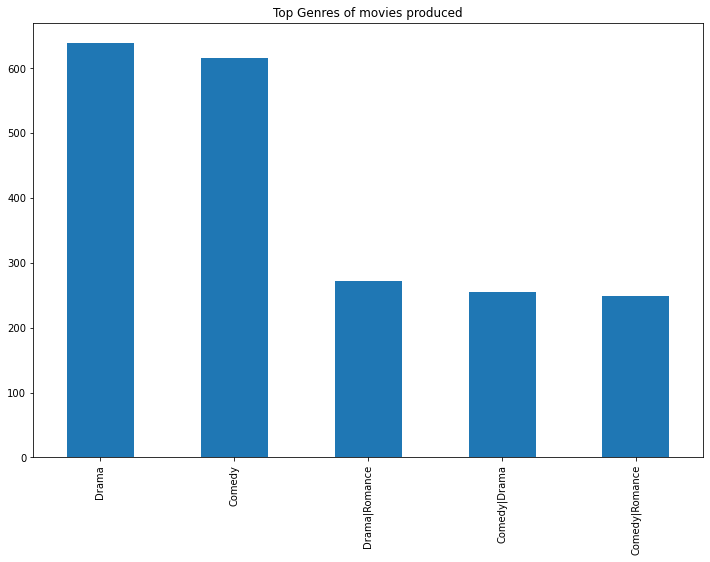

In [10]:
genre.plot(kind = 'bar', figsize = (12,8))
plt.title('Top Genres of movies produced')

The Top five genres of movies produced are  
Drama (638),  Comedy(615), Drama & Romance (272), Comedy & Drama (255), Comedy & Romance (248)

### 2. Which year had the highest number of tmdb movie released?

In [11]:
year = data['release_year'].value_counts().head()
year

2014    635
2013    567
2015    558
2012    498
2009    472
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Years with highest number of movie productions')

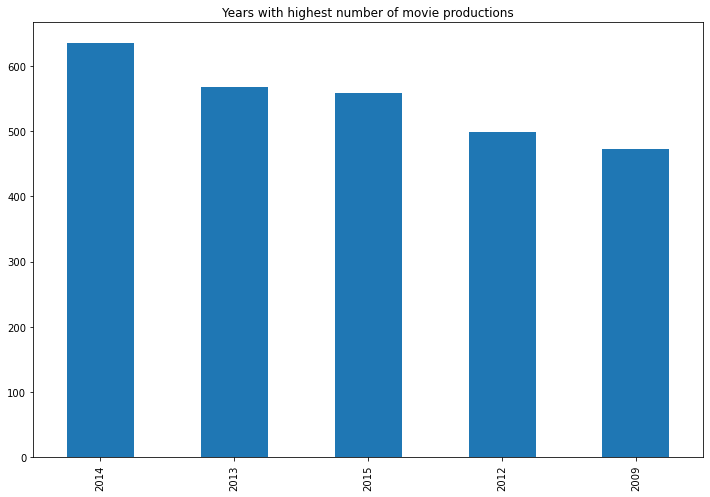

In [12]:
year.plot(kind = 'bar', figsize = (12,8))
plt.title('Years with highest number of movie productions')

Year 2014 witnessed highest number of movies produced.

# 3. Which movie generated the  highest Revenue adjusted?

In [13]:
highest = data[data.revenue_adj == max(set(data.revenue_adj))]
highest

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/2009,8458,7.1,2009,240886902.9,2.827124e+09


Avatar released in 2009, directed by James Cameron, with a popularity index of 9.43 generated adjusted revenue of 2.827124e+09

# 4. What is the relationship between budget and revenue, adjusted_budget and adjusted_revenue?

Text(0.5, 1.0, 'Relationship between Budget and Revenue')

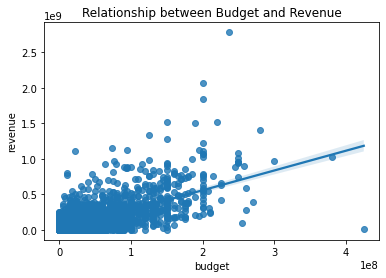

In [14]:
import seaborn as sns
sns.regplot(x = 'budget', y = 'revenue', data = data)
plt.title('Relationship between Budget and Revenue')

Text(0.5, 1.0, 'Relationship between Adjusted Budget and Adjusted Revenue')

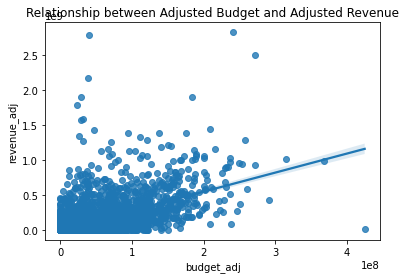

In [15]:
sns.regplot(x = 'budget_adj', y = 'revenue_adj', data = data)
plt.title('Relationship between Adjusted Budget and Adjusted Revenue')

There is a linear relationship between Revenue and budget, we can see the more the budget the more the revenue.

# 5. Which Movie is the most popular?

In [16]:
most_popular = data[data.popularity == max(set(data.popularity))]
most_popular

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09


Jurassic World is the most popular movie with a popularity index of 32.98

# 6. Which movie had the longest run time?

In [17]:
longest = data[data.runtime == max(set(data.runtime))]
longest

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4041,tt0289830,0.469332,0,0,Taken,Dakota Fanning|Matt Frewer|Eric Close|Emily Be...,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,877,Science Fiction,DreamWorks,12/02/2002,38,6.8,2002,0.0,0.0


Band of Brothers is the movie with the longest runtime with 705mins.

# 7. Who directed the most number of movies

Having in mind some directors paired up to direct a movie while some directed alone, it will be fair enough to split the director column using the explode() function

In [18]:
# lets change the '|' to ','
columns = ['cast','genres','production_companies', 'director']
for column in columns:
    data[column] = data[column].str.split('|', expand = False)
data.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",[George Miller],120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",[Robert Schwentke],119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",[J.J. Abrams],136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",[James Wan],137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [19]:
director_data =data.explode('director')
director_data['director'].value_counts()

Woody Allen         43
Clint Eastwood      34
Steven Spielberg    30
Martin Scorsese     28
Ridley Scott        23
                    ..
David Hayter         1
Huck Botko           1
David Campbell       1
Si-myung Lee         1
Harold P. Warren     1
Name: director, Length: 4758, dtype: int64

Woody Allen has been involved either as a sole director or co director in 43 movies.

# 8. Which cast featured most in the movies?

In [20]:
cast_data = data.explode('cast')
cast_data['cast'].value_counts()

Robert De Niro       72
Samuel L. Jackson    70
Bruce Willis         62
Nicolas Cage         61
Michael Caine        52
                     ..
Aya Endo              1
Rie Kugimiya          1
Yuichi Nakamura       1
Aya Hirano            1
Stephanie Nielson     1
Name: cast, Length: 17123, dtype: int64

Robert De Niro has featured as a cast in 72 tmdb movies.

# 9. Which production comapnay have been involved  the most in the production of tmdb movies the most?

In [21]:
company_data = data.explode('production_companies')
company_data.production_companies.value_counts()

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
                                         ... 
Discovery Channel Pictures                  1
Bullet Pictures                             1
Monophonic Inc.                             1
Populist Pictures                           1
Norm-Iris                                   1
Name: production_companies, Length: 7842, dtype: int64

Universal Pictures has been involved in the production of 522 tmdb movies closely followed by Warner Bros which has been involved in the production of 509 tmdb movies.

# 10. Whats the Correlation between the variables?

In [22]:
data.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.538914,0.662402,0.156259,0.802956,0.239169,0.110982,0.505370,0.606453
budget,0.538914,1.000000,0.731195,0.214177,0.627057,0.096137,0.138312,0.968313,0.616313
revenue,0.662402,0.731195,1.000000,0.183225,0.788528,0.192097,0.071788,0.702356,0.918030
runtime,0.156259,0.214177,0.183225,1.000000,0.184229,0.194442,-0.133579,0.249020,0.198240
vote_count,0.802956,0.627057,0.788528,0.184229,1.000000,0.279924,0.124775,0.580431,0.704036
vote_average,0.239169,0.096137,0.192097,0.194442,0.279924,1.000000,-0.140157,0.109883,0.214744
release_year,0.110982,0.138312,0.071788,-0.133579,0.124775,-0.140157,1.000000,0.036174,-0.056260
budget_adj,0.505370,0.968313,0.702356,0.249020,0.580431,0.109883,0.036174,1.000000,0.640838
revenue_adj,0.606453,0.616313,0.918030,0.198240,0.704036,0.214744,-0.056260,0.640838,1.000000


Budget and Adjusted Budget has the highest correlation with a correlation coefficient of 0.968

<a id='conclusions'></a>
## Conclusions
The movie industry has been a growing industry over the years, this project performs an exploratory data analysis on tmdb mpvies data.

From the analysis, Universal PIctures has been directly involved in the production of more tmdb movies  (522) at least 13 mmore than the closest rival Warner Bros. (509).

Actor Robert De Niro has featured as a cast in 72 tmdb movies the highest of any cast to have featured in a tmdb movie.

Woody Allen has been involved either as a sole director or co director in 43 movies, highest amongst the directors involved.

Talking about the movie with the longest run time, Band of Brothers is the longest  with 705 mins.

Jurassic World is the most popular tmdb movie with a popularity index of 32.98.

The Top five genres of movies produced are: 
Drama (638),  Comedy(615), Drama & Romance (272), Comedy & Drama (255), Comedy & Romance (248).

Avatar released in 2009, directed by James Cameron, with a popularity index of 9.43 generated adjusted revenue of 2.827124e+09

Limitation of the study?

The data contains several missing data which i ended up removing but could have added more information to the findings in our analysis.